<h1>Traffic Sign Recognition/Classifier</h1>

In [2]:
import os

In [4]:
directory = os.path.join('./')

In [5]:
import numpy as np
import pandas as pd

<h3>Load Data</h3>

In [6]:
train_df = pd.read_csv('train.csv')
train_df.shape

(39209, 8)

In [7]:
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [8]:
train_df['ClassId'].value_counts()

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
8     1410
3     1410
11    1320
18    1200
35    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
34     420
6      420
16     420
22     390
36     390
40     360
20     360
21     330
39     300
24     270
29     270
32     240
42     240
41     240
27     240
37     210
19     210
0      210
Name: ClassId, dtype: int64

<Figure size 1080x1080 with 0 Axes>

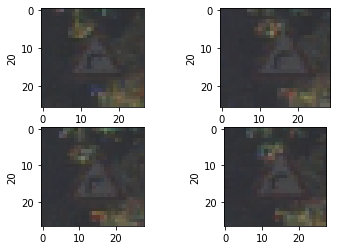

In [9]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

plt.figure(figsize=(15,15))
fig, ax = plt.subplots(nrows=2, ncols=2)

for i in range(2):
    for j in range(2):
        #Reading files after concatenating file name with folder path
        image = imread(os.path.join(directory,train_df["Path"][i+2*j]))
        #showing some images of the dataset
        ax[i,j].imshow(image)
        ax[i,j].set_ylabel(train_df["ClassId"][i+2*j])

<h3>Train Test Split Data</h3>

In [10]:
from sklearn.model_selection import train_test_split

train_imgs, val_imgs, train_labels, val_labels = train_test_split(train_df['Path'],
                                                                    train_df['ClassId'], 
                                                                    test_size=0.2, random_state=42,shuffle=True)

print(train_imgs.shape, val_imgs.shape)
print(train_labels.shape,val_labels.shape)

(31367,) (7842,)
(31367,) (7842,)


<h3>HOG Features</h3>

In [15]:
from skimage.feature import hog

In [16]:
index= np.random.randint(0,1000)

image = imread(os.path.join(directory,train_imgs.iloc[index]))
dims = (128,64) # SkIMAGE takes input in HEIGHT X WIDTH format
image2 = resize(image,dims)

#HOG features
features, hog_image = hog(image2, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

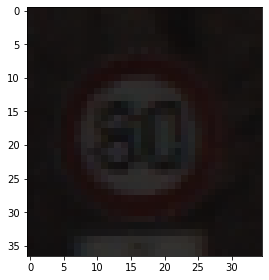

In [17]:
imshow(image)

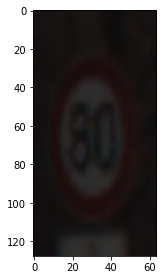

In [18]:
imshow(image2)

/Users/CaitlanKrasinski/miniconda3/envs/av/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


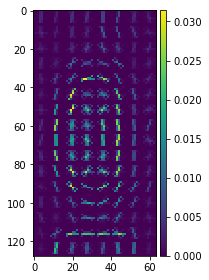

In [19]:
imshow(hog_image)

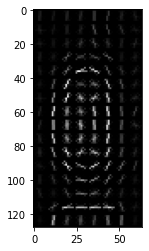

In [20]:
import matplotlib.pyplot as plt
plt.imshow(hog_image, cmap="gray")

<h4>Feature Generation</h4>

In [22]:
dims = (128,64)

In [23]:
#For Training

train_features = []
for i in train_imgs:
    image = imread(os.path.join(directory,i))
    image = resize(image,dims)
    #HOG features
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    hog_features = np.reshape(features,(features.shape[0]))
    train_features.append(hog_features)

train_features = np.array(train_features)

In [25]:
#For Validation

val_features = []
for i in val_imgs:
    image = imread(os.path.join(directory,i))
    image = resize(image,dims)
    #HOG features
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    hog_features = np.reshape(features,(features.shape[0]))
    val_features.append(hog_features)

val_features = np.array(val_features)

In [26]:
train_features.shape, val_features.shape

((31367, 3780), (7842, 3780))

<h3>SVC Model</h3>

In [31]:
from sklearn.svm import LinearSVC

clf_svc_hog = LinearSVC()
clf_svc_hog.fit(train_features,train_labels)

/Users/CaitlanKrasinski/miniconda3/envs/av/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [32]:
from sklearn.metrics import accuracy_score

preditions_train = clf_svc_hog.predict(train_features)
print("Train Score: ",accuracy_score(train_labels,preditions_train))

predictions_val = clf_svc_hog.predict(val_features)
print("Validation Score: ",accuracy_score(predictions_val,val_labels))

Train Score:  1.0
Validation Score:  0.9672277480234635
